# Pokemon GO shiny rates: a Bayesian perspective
This document aims to re-study Pokemon GO shiny rates using data collected by The Silph Road.

## Background: Silph, shinies, and statistics
[The Silph Road](https://thesilphroad.com/) is the largest online and in-person network of Pokemon GO players. Silph organizes regional groups of Pokemon GO players, sets up in-person tournaments, and conducts field studies to learn about game mechanics of Pokemon GO. Of particular interest to us here is the *shiny rate*, which is the probability that a Pokemon found in the wild will be shiny (for non-Pokemon players, this just means it's rare and specially coloured; it's like a trophy). Though not publicized by the game developer Niantic, this rate has been of great interest to Pokemon GO players (after all, shinies are not too far off from loot boxes).

Silph publishes [field studies](https://thesilphroad.com/science/oddish-shiny-rates/) to determine shiny rates, and these studies have resulted in two consensus rates: one "standard" rate of 1/450 (used for the vast majority of Pokemon), and one "boosted" rate of 1/150 (used during certain events). Recently, however, those rates have been [called into question](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/) on the Silph subreddit, saying that they are not consistent with the collected data.

Statistically speaking, a couple of users have demonstrated that the assumed rates of 1 in 450 and 1 in 150 are probably inaccurate. The post linked above [drew attention](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/) to a source using bot data to discredit the 1 in 450 rate (which is against the Silph terms), and another [showed](https://old.reddit.com/r/TheSilphRoad/comments/dd6ln1/world_wide_oddish_shiny_rates/f2egcsx/) that the 1 in 150 rate is not within a 99% confidence interval when pooling data over the last few months.

This conversation has lacked nuance from all parties. Silph has, perhaps unknowingly, treated the assumed 1 in 450 shiny rate as fact on several occasions (["using the base shiny rate of 1 in 450, as expected"](https://thesilphroad.com/science/quick-discovery/ultra-bonus-week-3-shiny-rates/), ["using the standard 1 in 450 rate"](https://thesilphroad.com/science/quick-discovery/johto-journey-sentret-gligar-shiny-rates/), and ["both species are using the standard 1 in 450 shiny rate"](https://thesilphroad.com/science/quick-discovery/water-festival-2019-barboach-and-carvanha-shiny-rates/)), but they may not realize the degree to which people believe their observations to be fact. Critics of Silph have gone so far as to claim that they are [spreading misinformation](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/f2er33m/), but this too is unfair: at best they are overstating the certainty in their conclusions.

Finally, to Silph's credit: they are a volunteer group of researchers, and few others are doing *any* research into Pokemon GO shiny rates. As the head of Silph [said](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/f2esyq8/), the focus of these studies was *not* re-affirming the assumed rate, but rather determining if a particular event had the standard or boosted rate, whatever those are. Their treatment of statistics is far better than the average layperson, and I commend them for that. But I think we can do better.


## Methodology
I went through the Silph archives looking for their shiny rate publications posted this year, and gathered them into a file `rates.csv`. The null rows in this file were the result of Silph not reporting their exact numbers (e.g., see [Spoink](https://thesilphroad.com/science/lunar-new-year-boosted-lucky-rates/) ("over 16,500 Spoink") and [Adventure Week](https://thesilphroad.com/science/quick-discovery/adventure-week-shiny-rates/) ("over 30,000 encounters each")). I chose to keep these in the dataset in case someone asks "what happened?" The two rows from Gligar were the result of an apparent change in the shiny rate after ~24 hours, which I am taking to be fact.

In [1]:
import pandas as pd

rates = pd.read_csv("rates.csv")
rates.sample(5)

,url,date,name,n_encounters,n_shiny
15,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722.0,53.0
20,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303.0,64.0
10,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627.0,40.0
24,https://thesilphroad.com/science/extraordinary...,20190522,bronzor,2479.0,15.0
0,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988.0,94.0


Let's compute the "rarity", defined as `n_encounters / n_shinies`. A rarity R means that we saw shinies with a rate of 1 in R.

In [2]:
rates["rarity"] = rates["n_encounters"] / rates["n_shiny"]
rates = rates.sort_values("rarity").dropna()
rates

,url,date,name,n_encounters,n_shiny,rarity
26,https://thesilphroad.com/science/shiny-meltan-...,20190225,meltan,7850.0,128.0,61.328125
17,https://thesilphroad.com/science/quick-discove...,20190629,exeggutor_a,1048.0,17.0,61.647059
15,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722.0,53.0,107.962264
2,https://thesilphroad.com/science/quick-discove...,20190921,yanma,4052.0,37.0,109.513514
20,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303.0,64.0,114.109375
0,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988.0,94.0,116.893617
13,https://thesilphroad.com/science/quick-discove...,20190727,sneasel,1588.0,13.0,122.153846
7,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234.0,33.0,128.303030
10,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627.0,40.0,140.675000
24,https://thesilphroad.com/science/extraordinary...,20190522,bronzor,2479.0,15.0,165.266667


Domain knowledge tells us that there are three classes of shiny rates here: a highly boosted one (around 1 in 60, for Alolan Exeggutor and Meltan), one boosted one (which Silph claims to be 1 in 150), and one normal one (which Silph claims to be 1 in 450). We can use this to partition the dataset manuallly, discarding the highly boosted samples because they're not relevant to this debate.

In [3]:
boosted = rates[rates["rarity"].between(70, 200)].sort_values("date").reset_index(drop=True)
unboosted = rates[rates["rarity"] > 200].sort_values("date").reset_index(drop=True)

In [4]:
boosted

,url,date,name,n_encounters,n_shiny,rarity
0,https://thesilphroad.com/science/extraordinary...,20190522,bronzor,2479.0,15.0,165.266667
1,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303.0,64.0,114.109375
2,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722.0,53.0,107.962264
3,https://thesilphroad.com/science/quick-discove...,20190727,sneasel,1588.0,13.0,122.153846
4,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627.0,40.0,140.675000
5,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234.0,33.0,128.303030
6,https://thesilphroad.com/science/quick-discove...,20190921,yanma,4052.0,37.0,109.513514
7,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988.0,94.0,116.893617


In [5]:
unboosted

,url,date,name,n_encounters,n_shiny,rarity
0,https://thesilphroad.com/science/quick-discove...,20190629,geodude_a,6724.0,19.0,353.894737
1,https://thesilphroad.com/science/quick-discove...,20190629,rattata_a,5179.0,14.0,369.928571
2,https://thesilphroad.com/science/quick-discove...,20190629,diglett_a,5373.0,11.0,488.454545
3,https://thesilphroad.com/science/quick-discove...,20190727,zubat,844.0,3.0,281.333333
4,https://thesilphroad.com/science/quick-discove...,20190727,ekans,13018.0,37.0,351.837838
5,https://thesilphroad.com/science/quick-discove...,20190727,koffing,24902.0,65.0,383.107692
6,https://thesilphroad.com/science/quick-discove...,20190824,barboach,9958.0,23.0,432.956522
7,https://thesilphroad.com/science/quick-discove...,20190824,carvanha,10386.0,20.0,519.300000
8,https://thesilphroad.com/science/quick-discove...,20190903,sentret,19297.0,54.0,357.351852
9,https://thesilphroad.com/science/quick-discove...,20190903,gligar_early,1971.0,3.0,657.000000


Let's start with the proposed boosted shiny rate of 1 in 150. We'll come back to the standard one later.

## The boosted shiny rate: the Bayesian way
Frequentist statistics would construct a confidence interval on these rates--it's a simple proportions test--and call it a day. Indeed, that's what both Silph (see every publication they put out) and [critics of Silph](https://old.reddit.com/r/TheSilphRoad/comments/dd6ln1/world_wide_oddish_shiny_rates/f2egcsx/) have done. After constructing this confidence interval, we simply check if 1/150 lies within it.

But we can do better than this yes/no response. Given that we believe that the boosted shiny rate is 1 in 150, the Bayesian way of thinking provides us with a natural way of incorporating this into our analysis: as a prior.

In [6]:
import arviz as az
import pymc3 as pm

az.style.use("fivethirtyeight")

### Setting priors
Let's use a [Beta](https://en.m.wikipedia.org/wiki/Beta_distribution) prior over p, since a Beta can be used as a distribution over probabilities. Using the [success rate interpretation](https://stats.stackexchange.com/a/47782) of the Beta, our prior will be 
fairly weak: equivalent to having seen 10 shinies in 1500 encounters. Put otherwise, our prior is that anything between 1 in 100 and 1 in 300 is plausible.

We'll add a second variable, rarity, which is 1 / p as defined before. This makes it easier to use phrases like "1 in 150" or "1 in N," and is more intuitive when talking about extremely small probabilities. Through the rest of this document, we'll mostly focus on the plots of the rarity.

In [7]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=10, beta=1490)
    rarity = pm.Deterministic("rarity", 1. / p)
    
prior_samples = pm.sample_prior_predictive(samples=10000, model=model)

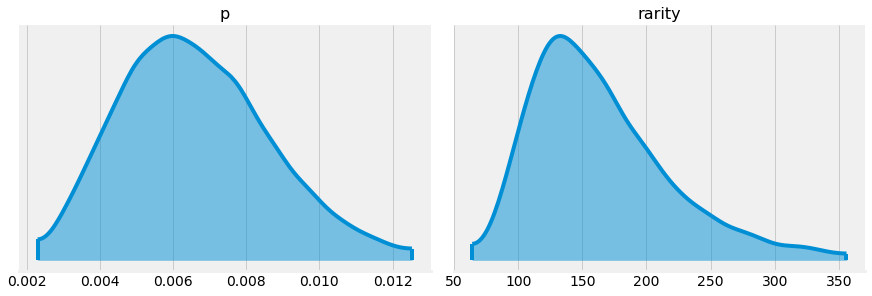

In [8]:
axes = az.plot_density(
    prior_samples,
    var_names=["p", "rarity"],
    point_estimate=None,
    credible_interval=0.99,
    shade=0.5,
    figsize=(12, 4),
)

From this, we can see that while 1/150 is at the center of our prior beliefs, we wouldn't be surprised with a rarity of 1 in 100 or 1 in 200 either. This is without having collected any data--if *all* we had heard was "the shiny rate is 1 in 150," but we weren't sure about that 150 number, this plot represents a plausible range of values.

### Adding data
One advantage of the Bayesian approach is that it lets us add as much or as little data as we have. We will demonstrate how our beliefs in the shiny rate change over time as we show our model more data (i.e., as we progress through time and have more shinies released).

In [9]:
from typing import Tuple

def encounters_and_shiny(df: pd.DataFrame, species_name: str) -> Tuple[float, float]:
    """Given a species name, retrieve the number of encounters and number of shinies"""
    
    row = df[df.name == species_name].iloc[0]
    return (row["n_encounters"], row["n_shiny"])

assert encounters_and_shiny(boosted, "sneasel") == (1588, 13)
assert encounters_and_shiny(unboosted, "sentret") == (19297, 54)

Beacuse each encounter is independently shiny with probability p, a binomial distribution is appropriate for modeling the number of shinies we see. We will use Markov Chain Monte Carlo to learn the likely distributions over our parameters (shiny rate and rarity). In lay terms, we will try to infer a distribution of most probable values for those parameters, little by little as we see more data. We'll start with just Bronzor. 

In [10]:
with model:
    n_encounters, n_shiny = encounters_and_shiny(boosted, "bronzor")
    bronzor = pm.Binomial("bronzor", n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1744.94draws/s]
The acceptance probability does not match the target. It is 0.899077501504706, but should be close to 0.8. Try to increase the number of tuning steps.


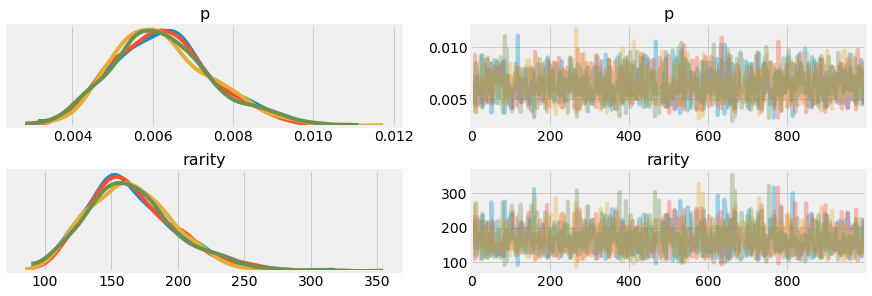

In [11]:
_ = az.plot_trace(trace)

This plot represents what we might have believed in February 2019, after seeing 15 out of 2479 shinies for Bronzor. The left curves represent the likely ranges for the shiny rate p and the rarity 1-in-N. For those unfamiliar with MCMC, ignore the fuzzy-caterpillar-like plots on the right; for those familiar with it, this model exhibits excellent sampling behavior.

Notice how we're already seeing that these distributions are a little bit tighter. We see virtually no likelihood of the rate being 1 in 300 now, but earlier we did. Meanwhile, 1 in 150 remains a highly likely shiny rate given our limited data.

Let's add the next Pokemon we had an event for, Horsea.

In [12]:
with model:
    n_encounters, n_shiny = encounters_and_shiny(boosted, "horsea")
    horsea = pm.Binomial("horsea", n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1872.27draws/s]
The acceptance probability does not match the target. It is 0.8872269538570352, but should be close to 0.8. Try to increase the number of tuning steps.


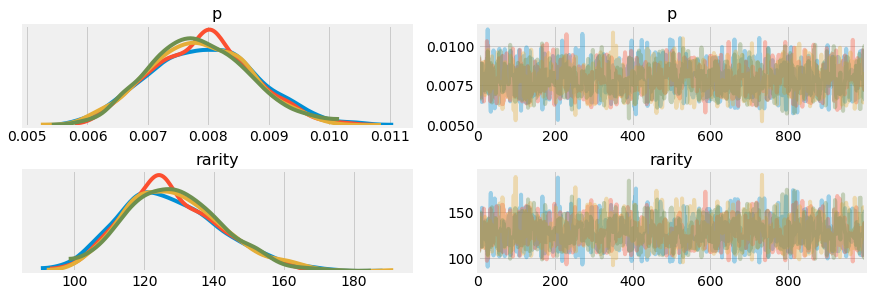

In [13]:
_ = az.plot_trace(trace)

Because we observed a rate of 1 in 114 for Poliwag, the likelihood for the rarity has now shifted much further left. It is now almost entirely implausible for the shiny rate to be any lower than 1 in 200, and even 1 in 150 is starting to look unlikely.

The next shiny released was Nidoran M.

In [14]:
with model:
    n_encounters, n_shiny = encounters_and_shiny(boosted, "nidoran_m")
    nidoran_m = pm.Binomial("nidoran_m", n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1879.74draws/s]


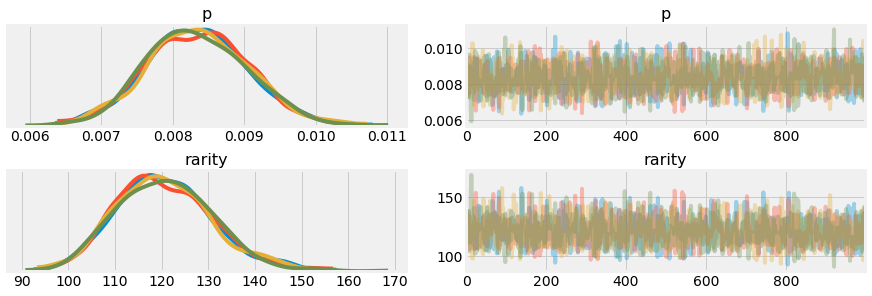

In [15]:
_ = az.plot_trace(trace)

Nidoran's observed rarity was 1 in 150 over 5700 encounters, and now it's becoming more clear that 1 in 150 is a pretty unlikely shiny rate. Let's do this one more time for Sneasel.

In [16]:
with model:
    n_encounters, n_shiny = encounters_and_shiny(boosted, "sneasel")
    sneasel = pm.Binomial("sneasel", n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1823.03draws/s]


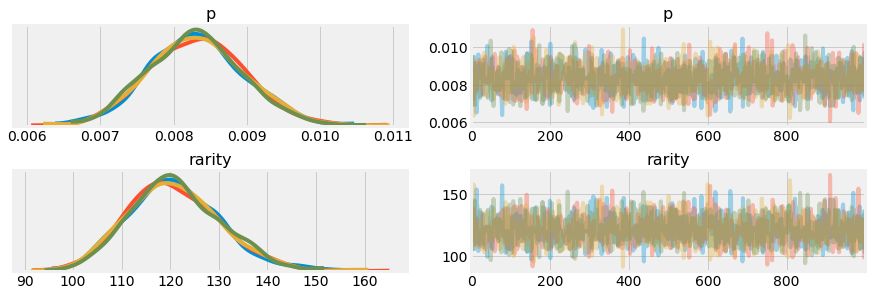

In [17]:
_ = az.plot_trace(trace)

At this point (perhaps earlier) I would feel confident saying that the shiny rate, whatever it is, is not 1 in 150. The Sneasel event happened in July 2019, and I'm writing this in October, so clearly that wasn't enough for the Pokemon GO community. Fortunately, four more events happened between then and now.

In [18]:
with model:
    n_encounters, n_shiny = encounters_and_shiny(boosted, "poliwag")
    poliwag = pm.Binomial("poliwag", n=n_encounters, p=p, observed=n_shiny)
    
    n_encounters, n_shiny = encounters_and_shiny(boosted, "gligar_later")
    gligar = pm.Binomial("gligar", n=n_encounters, p=p, observed=n_shiny)
    
    n_encounters, n_shiny = encounters_and_shiny(boosted, "yanma")
    yanma = pm.Binomial("yanma", n=n_encounters, p=p, observed=n_shiny)

    n_encounters, n_shiny = encounters_and_shiny(boosted, "oddish")
    oddish = pm.Binomial("oddish", n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(1000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1816.76draws/s]


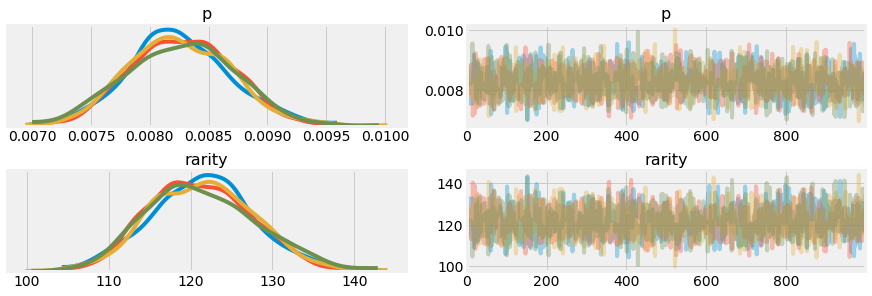

In [19]:
_ = az.plot_trace(trace)

We can confidently say that **it is extremely unlikely that the boosted shiny rate is 1 in 150.** It is much more plausible that the rate is in the neighborhood of 1 in 120, as 150 hasn't even registered on our posterior plot of the rarity.

Notice how natural a fit the Bayesian way of thinking was: we have some prior beliefs (that the rate is 1 in 150), and some data (the Silph studies), and we can marry the two together to get a posterior (the plot we see above). It's clear that the data do not support our prior beliefs, but that's okay; we're researchers, and that's how this is supposed to work. 

## The normal shiny rate (supposedly 1 in 450)
Let's look next at the normal shiny rate, which is supposedly 1 in 450. For brevity's sake, I won't take us through the step-by-step process again, but rather pass all the data at once.

In [20]:
with pm.Model() as model:
    p = pm.Beta("p", alpha=10, beta=4490)
    rarity = pm.Deterministic("rarity", 1. / p)
    
prior_samples = pm.sample_prior_predictive(samples=10000, model=model)

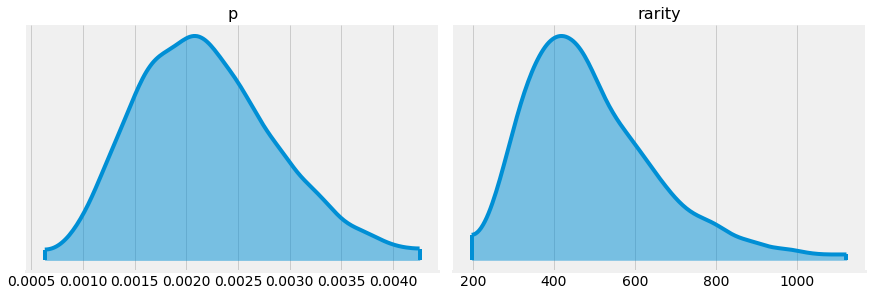

In [21]:
axes = az.plot_density(
    prior_samples,
    var_names=["p", "rarity"],
    point_estimate=None,
    credible_interval=0.99,
    shade=0.5,
    figsize=(12, 4),
)

Our prior is again relatively uninformative because we're not very confident in the particular value of 1 in 450. Let's add the data. 

In [22]:
with model:
    for name in unboosted.name.values:
        n_encounters, n_shiny = encounters_and_shiny(unboosted, name)
        _ = pm.Binomial(name, n=n_encounters, p=p, observed=n_shiny)
    
    trace = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [p]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:06<00:00, 1591.92draws/s]


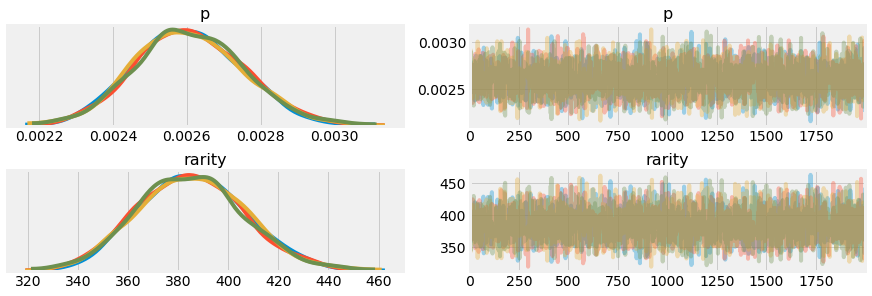

In [23]:
_ = az.plot_trace(trace)

Here, too, we see that the prior belief of 1 in 450 is no longer likely after considering our data. According to the Silph studies, the true shiny rate is likely between 1 in 350 and 1 in 425. 

To make things more complex: there's growing consensus that the true shiny rate is *rarer* than 1 in 450, not more common, which is the opposite of what this data says. See this [Reddit comment](https://old.reddit.com/r/TheSilphRoad/comments/dd79zk/its_time_to_rethink_the_assumed_shiny_rates_from/f2ey7wv/) for an example; using an unnamed dataset, this user and others in that thread feel confident in a 1 in 500 rate. The comment chain discusses why the Silph shiny data may be biased to making shinies appear more common, and it's very possible that this is the case. **These methods are only as good as our data is;** if our data is flawed, our conclusions will be too.

## Statistical nuance and the importance of uncertainty
